In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
class obj:
      
    # constructor
    def __init__(self, dict1):
        self.__dict__.update(dict1)

In [3]:
listOfFiles = os.listdir()

In [4]:
matchList = []
for fileName in listOfFiles:
    if(fileName[-5:] == '.json'):
        with open(fileName, 'r') as file:
            jsonString = file.read()
        
        matchData = json.loads(jsonString, object_hook = obj)
        matchData.MatchId = int(fileName.split()[0])
        
        matchList.append(matchData)

In [5]:
matchList[0].Team1

'DRX'

In [6]:
playerStats = pd.read_csv("PlayerStats.csv")
playerStats

,PLAYER,RND,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,HS%,CL%,CL,KMAX,K,D,A,FK,FD
0,yay\nOPTC,397,262.4,1.61,75%,164.6,0.96,0.09,0.21,0.08,26%,14%,6/44,30,382,238,35,82,30
1,kiNgg\nLEV,179,260.0,1.36,77%,160.9,0.89,0.30,0.23,0.12,23%,11%,2/18,26,159,117,53,42,21
2,Derke\nFNC,319,247.9,1.39,70%,166.2,0.92,0.13,0.17,0.15,34%,21%,5/24,31,292,210,42,53,47
3,ZmjjKK\nEDG,107,247.8,1.07,74%,150.5,0.82,0.15,0.23,0.09,25%,13%,2/15,19,88,82,16,25,10
4,Will\n100T,157,245.3,1.16,72%,155.0,0.86,0.19,0.20,0.13,18%,13%,2/16,28,135,116,30,31,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Enzo\nFNC,319,159.1,0.90,75%,106.2,0.55,0.39,0.03,0.05,22%,10%,4/40,19,174,193,125,10,16
77,BerserX\nBME,131,155.8,0.69,61%,100.7,0.55,0.12,0.12,0.19,18%,NaN,0/6,21,72,105,16,16,25
78,Khalil\nFUR,113,154.6,0.77,65%,103.8,0.57,0.27,0.06,0.09,24%,8%,1/13,18,64,83,30,7,10
79,Mazin\nFUR,113,146.4,0.70,62%,108.3,0.54,0.35,0.04,0.19,27%,7%,1/15,28,61,87,39,4,21


Stats of players of optic and loud

In [7]:
loclist = []
for i in range(len(playerStats)):
    if(playerStats['PLAYER'][i].split()[-1] == 'OPTC' or playerStats['PLAYER'][i].split()[-1] == 'LOUD'):
        loclist.append(i)
playerStats.loc[loclist].reset_index(drop = True)

#playerStats.sort_values(by=['CL%'])

,PLAYER,RND,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,HS%,CL%,CL,KMAX,K,D,A,FK,FD
0,yay\nOPTC,397,262.4,1.61,75%,164.6,0.96,0.09,0.21,0.08,26%,14%,6/44,30,382,238,35,82,30
1,Less\nLOUD,271,224.2,1.37,73%,145.1,0.83,0.18,0.11,0.10,24%,21%,6/28,27,226,165,50,31,28
2,aspas\nLOUD,271,215.5,1.05,69%,138.9,0.75,0.21,0.14,0.14,25%,5%,1/20,21,203,193,57,37,38
3,pancada\nLOUD,271,212.7,1.33,80%,137.5,0.78,0.38,0.08,0.04,35%,17%,5/29,21,212,159,104,23,11
4,Victor\nOPTC,397,207.3,1.04,73%,134.7,0.71,0.24,0.15,0.16,25%,17%,4/24,28,282,272,96,59,62
5,crashies\nOPTC,397,198.2,1.07,74%,128.5,0.69,0.39,0.07,0.07,26%,12%,5/43,28,274,255,156,27,29
6,saadhak\nLOUD,271,195.9,1.01,72%,128.4,0.66,0.41,0.10,0.17,20%,13%,2/16,26,178,177,111,27,47
7,Sacy\nLOUD,271,191.8,1.07,76%,126.3,0.66,0.39,0.07,0.04,25%,7%,2/29,22,178,166,107,19,10
8,Marved\nOPTC,397,187.9,0.93,73%,123.7,0.64,0.36,0.08,0.09,29%,19%,7/36,22,256,274,144,32,34
9,FNS\nOPTC,397,167.4,0.82,71%,111.7,0.54,0.35,0.03,0.08,21%,7%,4/54,17,214,261,137,10,32


In [8]:
TeamsListFull = []
for match in matchList:
    TeamsListFull.append(match.Team1)
    TeamsListFull.append(match.Team2)

TeamsListFull = list(set(TeamsListFull))

## How well are players working with teams

For this I am calculating how much percent times players are top 2 fragging in all there matches and calculating the sum of difference between the players and the bottom percent:

ex. There are 5 players in a team: P1, P2, P3, P4, P5

They come in top 2 fragging with%: 70, 50, 40, 30, 10

so the score for the team = (70-10)+(50-10)+(40-10)+(30-10)

In [9]:
TopNfraggers = 2

In [10]:
scoreList = []
for match in matchList:
    for mapData in match.ListOfMapData:
        #Team 1
        for playerData in mapData.ListOfPlayerDataTeam1:
            scoreList.append([playerData.Name, playerData.Team, 0, 0])
        
        #Team 2
        for playerData in mapData.ListOfPlayerDataTeam2:
            scoreList.append([playerData.Name, playerData.Team, 0, 0])
        
scoreDf = pd.DataFrame(scoreList, columns=['PlayerName', 'Team', 'FragGameCount', 'NumMaps']).drop_duplicates().reset_index(drop=True)

In [11]:
for match in matchList:
    for mapData in match.ListOfMapData:
        if(mapData.MapName != 'all'):
            #Team1
            for i in range(min(5, TopNfraggers)):
                scoreDf.loc[scoreDf["PlayerName"] == mapData.ListOfPlayerDataTeam1[i].Name, 'FragGameCount'] += 1
                
            scoreDf.loc[scoreDf["Team"]==mapData.ListOfPlayerDataTeam1[0].Team, 'NumMaps'] += 1
            
            #Team2
            for i in range(min(5, TopNfraggers)):
                scoreDf.loc[scoreDf["PlayerName"] == mapData.ListOfPlayerDataTeam2[i].Name, 'FragGameCount'] += 1
                
            scoreDf.loc[scoreDf["Team"]==mapData.ListOfPlayerDataTeam2[0].Team, 'NumMaps'] += 1

scoreDf['FragGamePercent'] = (scoreDf['FragGameCount']/scoreDf['NumMaps'])*100

TeamListHalf = scoreDf['Team'].unique().tolist()

fragScoreTeam = []
for team in TeamListHalf:
    teamScoreList = scoreDf.loc[scoreDf['Team']==team, 'FragGamePercent'].tolist()
    teamScoreList.sort(reverse=True)
    
    fragScore = 0
    for i in range(len(teamScoreList)-1):
        fragScore += teamScoreList[i] - teamScoreList[-1]
    fragScoreTeam.append([team, fragScore])
fragScoreTeam = pd.DataFrame(fragScoreTeam, columns=['Team', 'Score'])

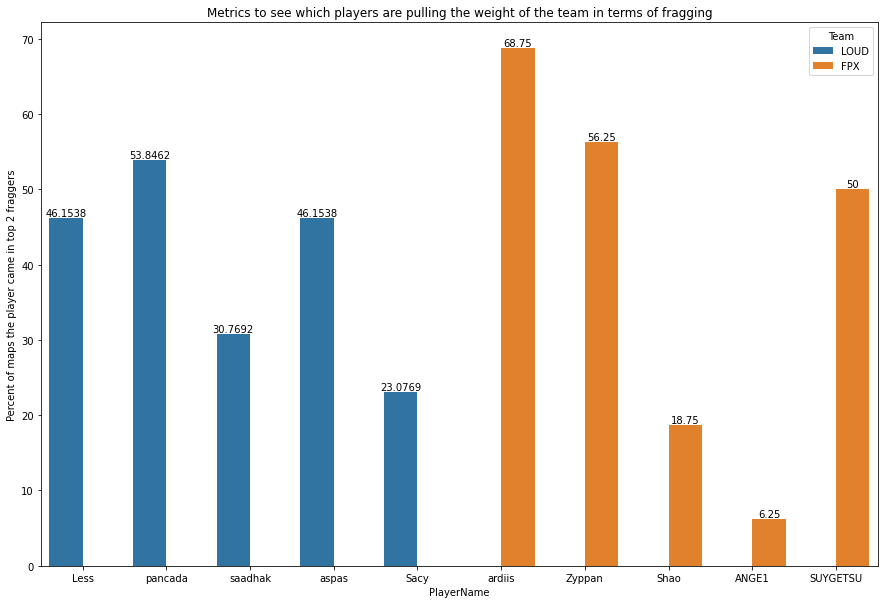

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))
xa = sns.barplot(data=scoreDf.loc[(scoreDf['Team']=='LOUD') | (scoreDf['Team']=='FPX')].reset_index(drop=True), x='PlayerName', y='FragGamePercent', hue='Team', ax=ax)
for i in xa.containers:
    xa.bar_label(i,)
    
plt.ylabel("Percent of maps the player came in top " + str(TopNfraggers) + " fraggers")
plt.title("Metrics to see which players are pulling the weight of the team in terms of fragging")
plt.show()

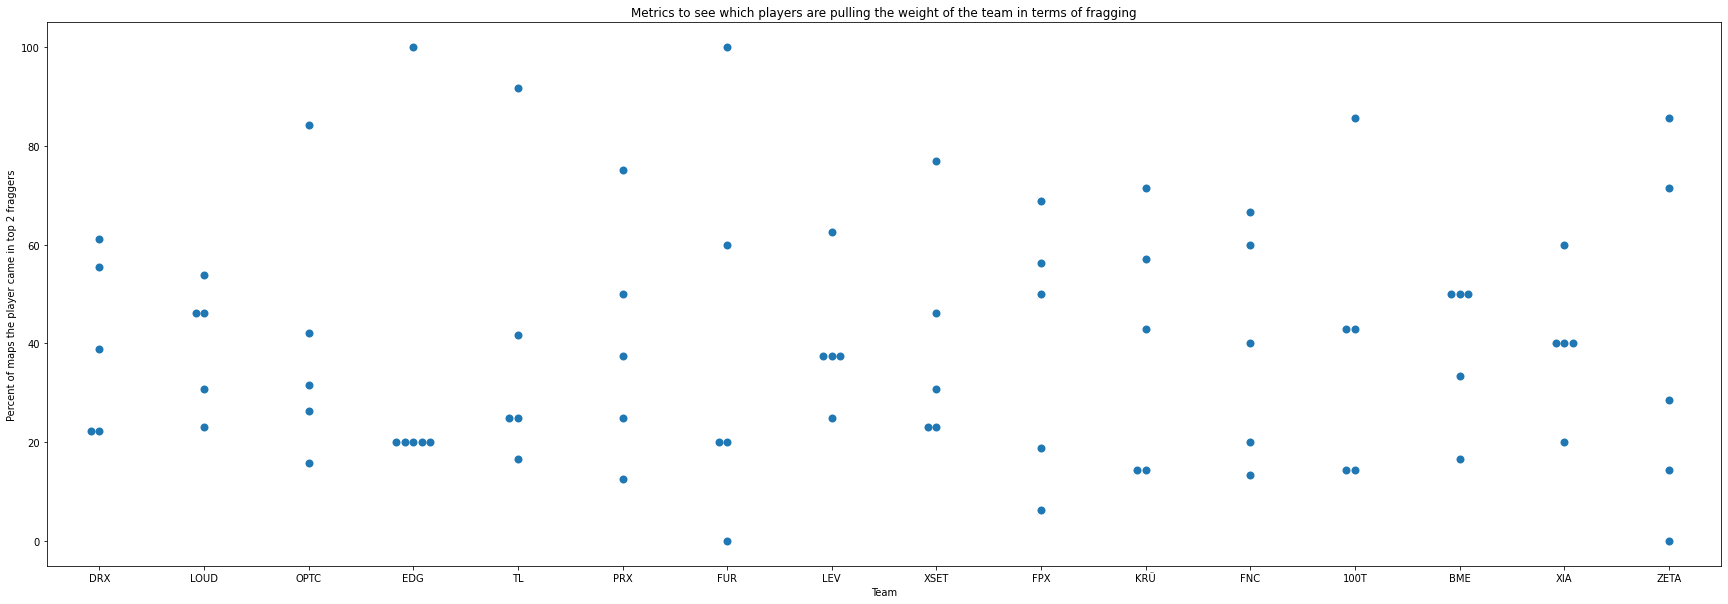

In [13]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.swarmplot(data=scoreDf, x="Team", y="FragGamePercent", size=8, ax=ax)

plt.ylabel("Percent of maps the player came in top " + str(TopNfraggers) + " fraggers")
plt.title("Metrics to see which players are pulling the weight of the team in terms of fragging")
plt.show()

#### Observations:
1. Looking in the graph below we can see that according to the metrics the players of LEV, EDG, LOUD all pull there weights in terms of how much every player frags.
2. Atleast with this metrics we can see Loud and Optic have a significant difference but which could be reduced by the fact of there star player Yay.
3. With the graph above we can see furia and EDG are the only 2 teams which have 1 player who is always is in the top 2 wrt ACS.
4. We can see this trend of star players in teams with Optic Yay, TL Scream, PRX forsaken being in the top 2 in terms of ACS, whereas there IGL's being the lowest in terms of this metrics.
5. An interesting team being FPX has there IGL Angel being only 6% of times in the top 2 wrt ACS, which reduces there score as the other teammates are very close to each other. We saw multiple times when Angel saved his team indivually and by his brain but is it time?

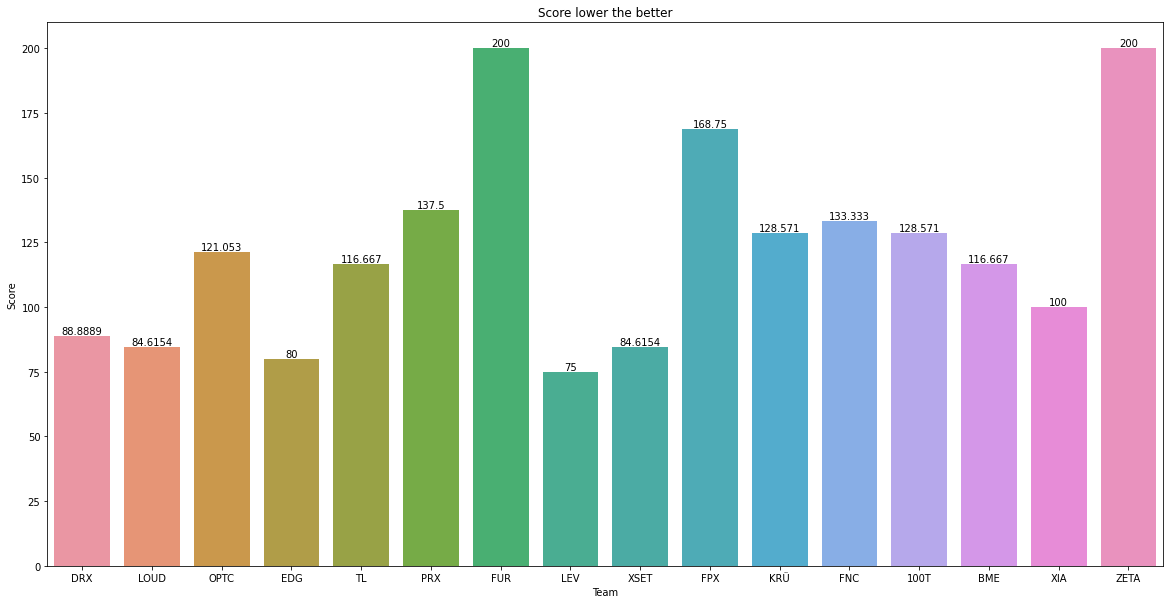

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
xa = sns.barplot(data=fragScoreTeam, x='Team', y='Score', ax=ax)
for i in xa.containers:
    xa.bar_label(i,)
    
plt.title("Score lower the better")
plt.show()

## How ACS varies with the depth of series

Plot of players ACS varying as tournament proceeds.

This shows are the players consistant as the tournament goes on or they perform worse as the pressure increases or are they just improve under pressure

In [15]:
teamList = ['OpTic Gaming', 'LOUD']
scoreDf = []
for match in matchList:
    if(match.Team1 in teamList):
        for mapData in match.ListOfMapData:
            if(mapData.MapName == 'all'):
                for playerData in mapData.ListOfPlayerDataTeam1:
                    scoreDf.append([playerData.Name, playerData.ACS[0], playerData.Team, match.MatchId])
        
    if(match.Team2 in teamList):
        for mapData in match.ListOfMapData:
            if(mapData.MapName == 'all'):
                for playerData in mapData.ListOfPlayerDataTeam2:
                    scoreDf.append([playerData.Name, playerData.ACS[0], playerData.Team, match.MatchId])

scoreDf = pd.DataFrame(scoreDf, columns=['Name', 'ACS', 'Team', 'MatchId'])
scoreDf[:10]

,Name,ACS,Team,MatchId
0,saadhak,239,LOUD,7
1,Less,237,LOUD,7
2,aspas,223,LOUD,7
3,pancada,191,LOUD,7
4,Sacy,186,LOUD,7
5,yay,245,OPTC,1
6,Victor,210,OPTC,1
7,FNS,189,OPTC,1
8,Marved,187,OPTC,1
9,crashies,177,OPTC,1


#### Observations:
1. The messy graph below for Loud reconfirms the above observation of Loud's players are playing equally and carrying the weight of others when someone else is down.
2. Well for Optic we know Yay going to be at the top most of the matches but the other players other than crashies dont even come close to 240 ACS whereas Loud's every player other than Sacy have.
3. Talking about Sacy, he is very consistant with his ACS being in the range of 180-210 througout the tournament.

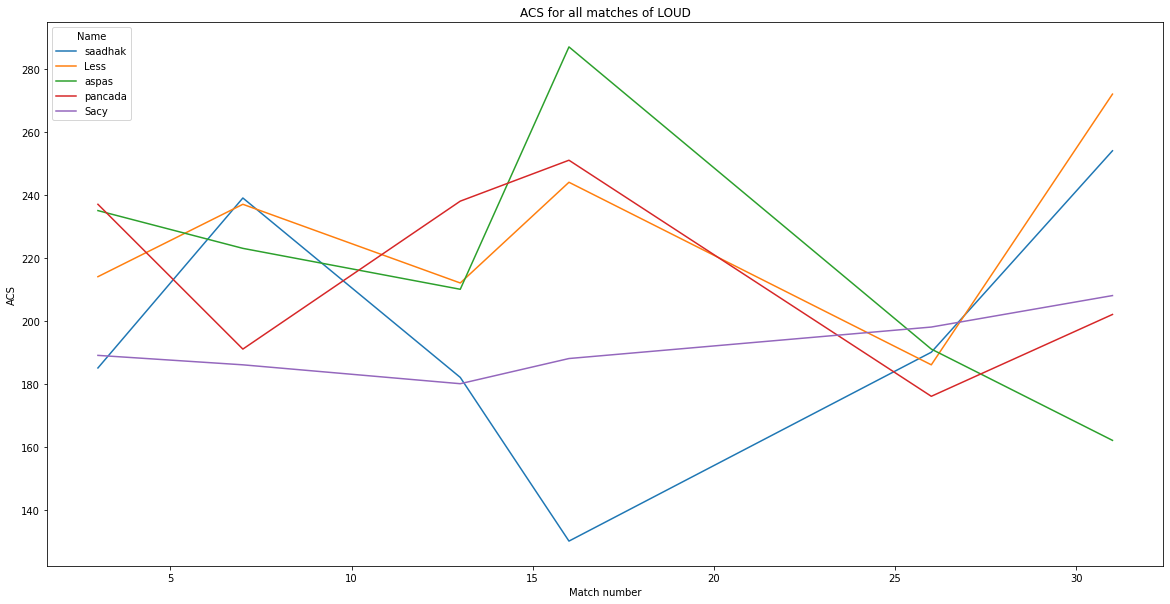

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=scoreDf.loc[scoreDf['Team']=='LOUD'], x='MatchId', y='ACS', hue='Name')
plt.xlabel("Match number")
plt.title("ACS for all matches of LOUD")
plt.show()

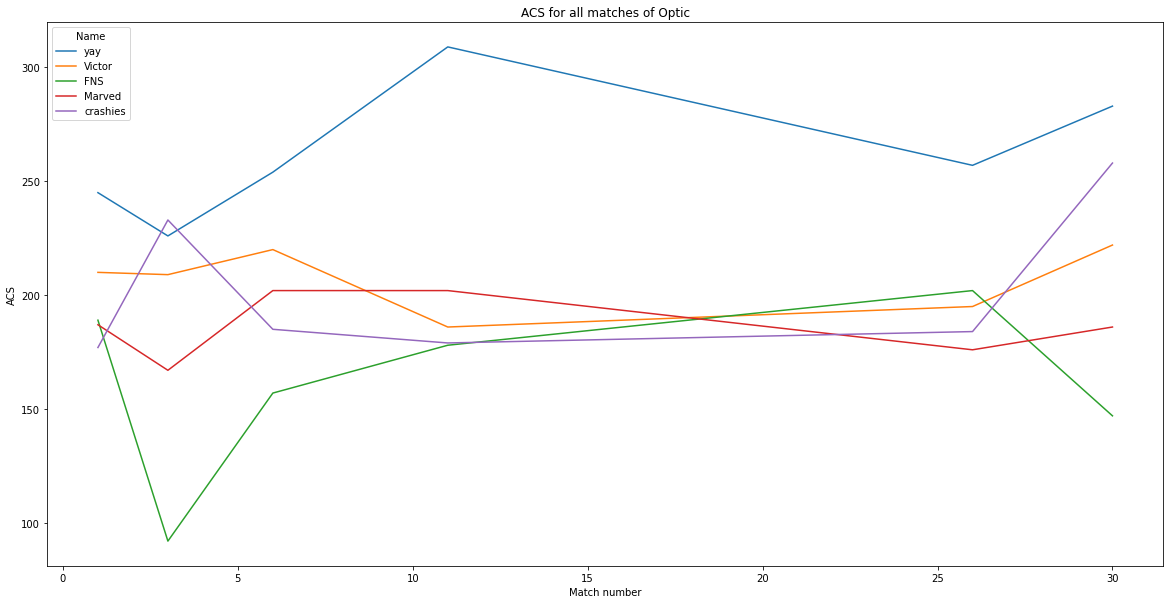

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=scoreDf.loc[scoreDf['Team']=='OPTC'], x='MatchId', y='ACS', hue='Name')
plt.xlabel("Match number")
plt.title("ACS for all matches of Optic")
plt.show()

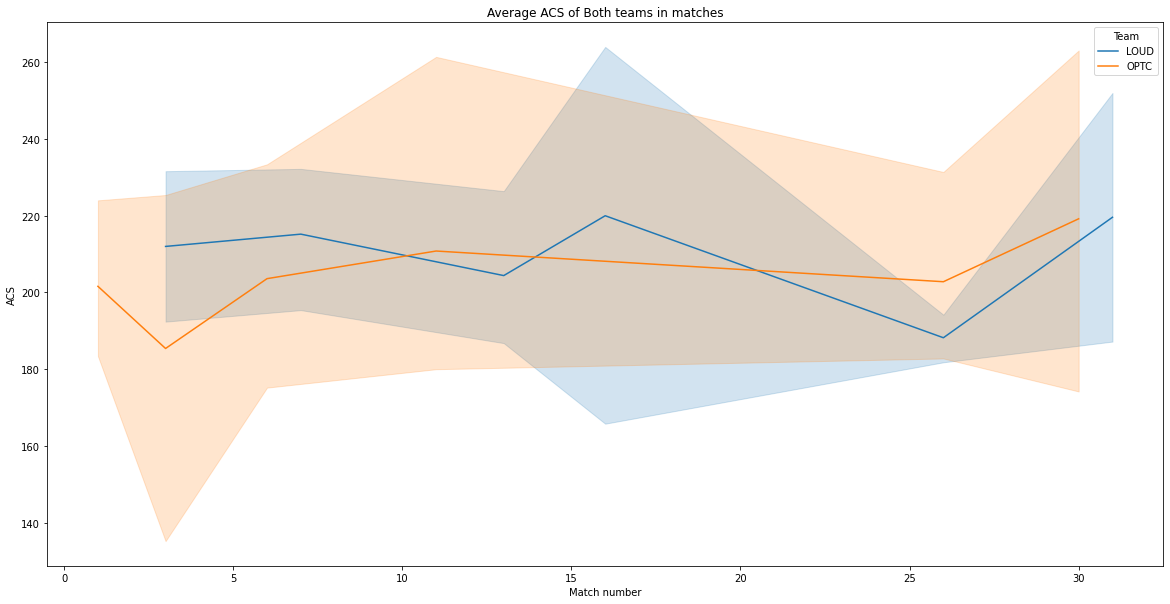

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=scoreDf, x='MatchId', y='ACS', hue='Team')
plt.xlabel("Match number")
plt.title("Average ACS of Both teams in matches")
plt.show()

## Popping off under pressure

Plot to see which players pop off in 3rd or later maps

#### Didn't realize till plotting LOUD only has 1 game where they had to play 3 maps. They be winning flawless

#### Also the only game they went to play 3 maps was against optic where they lost

In [19]:
scoreDf = []
for match in matchList:
    if(match.Team1 in teamList and len(match.ListOfMapData)>3):
        for mapData in match.ListOfMapData:
            if(mapData.MapName != 'all'):
                for playerData in mapData.ListOfPlayerDataTeam1:
                    scoreDf.append([playerData.Name, playerData.ACS[0], mapData.MapNumber, playerData.Team, match.MatchId])
        
    if(match.Team2 in teamList and len(match.ListOfMapData)>3):
        for mapData in match.ListOfMapData:
            if(mapData.MapName != 'all'):
                for playerData in mapData.ListOfPlayerDataTeam2:
                    scoreDf.append([playerData.Name, playerData.ACS[0], mapData.MapNumber, playerData.Team, match.MatchId])
                    
                    
scoreDf = pd.DataFrame(scoreDf, columns=['Name', 'ACS', 'MapNumber', 'Team', 'MatchId'])
scoreDf[:10]

,Name,ACS,MapNumber,Team,MatchId
0,Victor,275,1,OPTC,1
1,FNS,246,1,OPTC,1
2,yay,220,1,OPTC,1
3,Marved,130,1,OPTC,1
4,crashies,124,1,OPTC,1
5,yay,282,2,OPTC,1
6,crashies,267,2,OPTC,1
7,FNS,197,2,OPTC,1
8,Victor,190,2,OPTC,1
9,Marved,176,2,OPTC,1


#### Observations:
1. Victor stepping up every time they go to play 3rd map and even in the later maps in the 1 BO5.
2. Marved having a slow start every game where they go on to full series.
3. Yay being Yay, lowest ACS in final map is 200.
4. FNS having a good 1st game then going down a bit.
5. LOUD clean with it by winning all BO3's 2-0

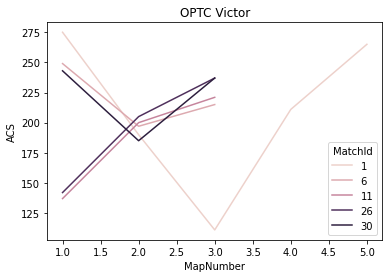

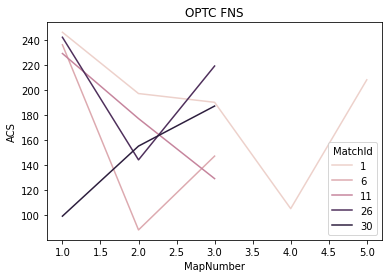

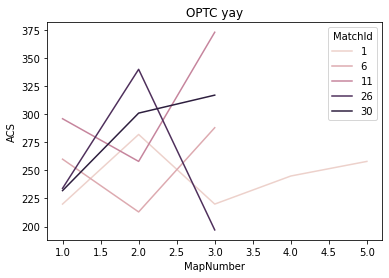

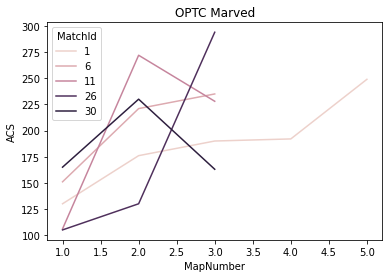

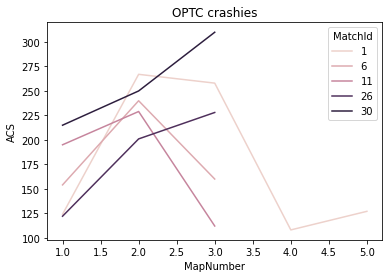

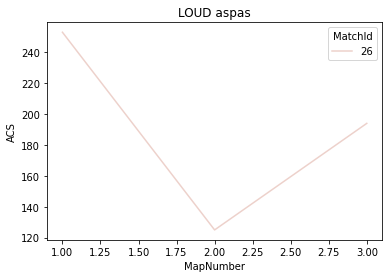

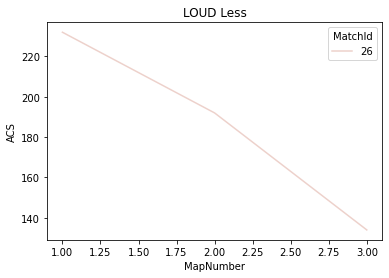

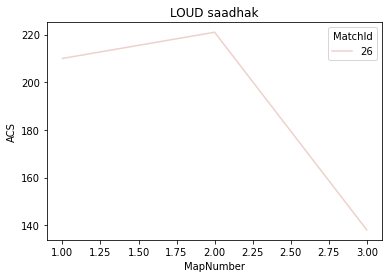

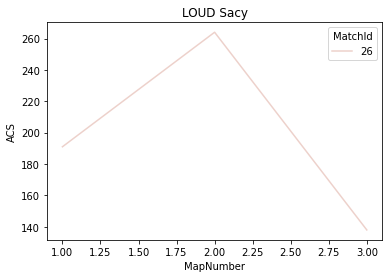

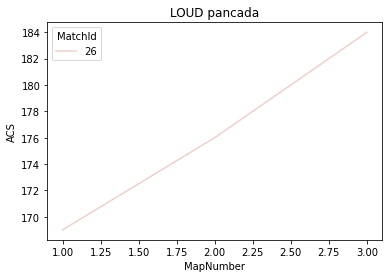

In [20]:
for player in scoreDf['Name'].unique().tolist():
    sns.lineplot(data=scoreDf.loc[scoreDf['Name']==player], x='MapNumber', y='ACS', hue='MatchId')
    plt.title(scoreDf.loc[scoreDf['Name']==player].reset_index(drop=True)['Team'][0] + " " + player)
    plt.show()


## For Loud's player analysis plotting graphs for matches with 2 maps as well

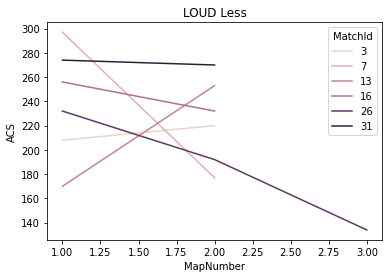

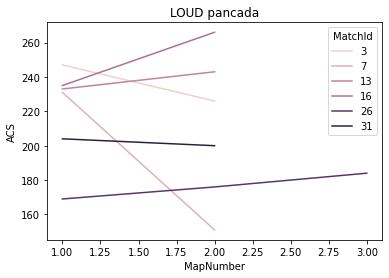

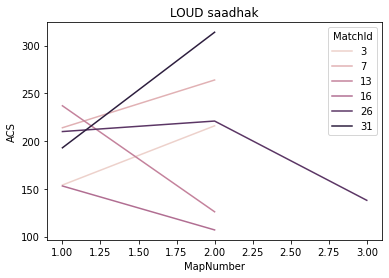

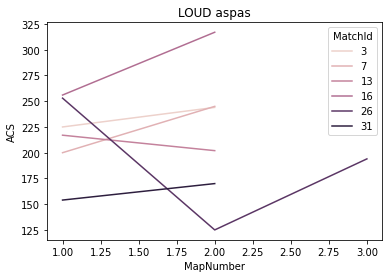

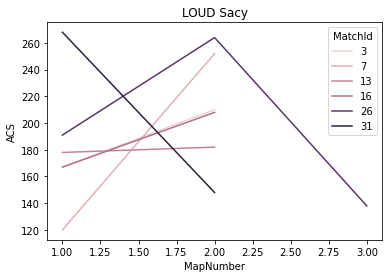

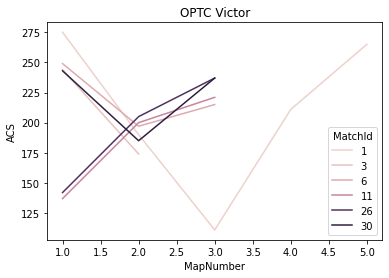

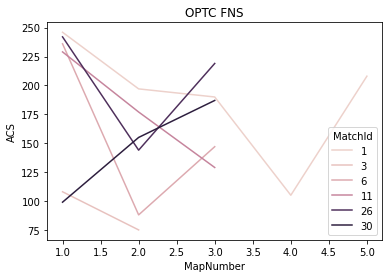

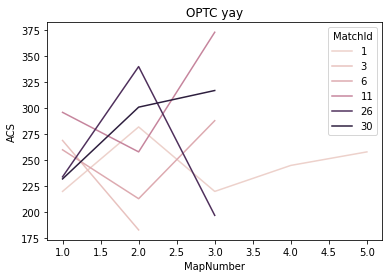

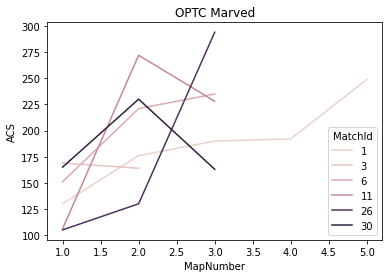

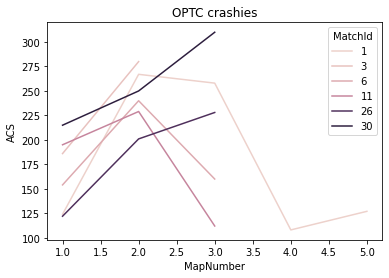

In [21]:
scoreDf = []
for match in matchList:
    if(match.Team1 in teamList):
        for mapData in match.ListOfMapData:
            if(mapData.MapName != 'all'):
                for playerData in mapData.ListOfPlayerDataTeam1:
                    scoreDf.append([playerData.Name, playerData.ACS[0], mapData.MapNumber, playerData.Team, match.MatchId])
        
    if(match.Team2 in teamList):
        for mapData in match.ListOfMapData:
            if(mapData.MapName != 'all'):
                for playerData in mapData.ListOfPlayerDataTeam2:
                    scoreDf.append([playerData.Name, playerData.ACS[0], mapData.MapNumber, playerData.Team, match.MatchId])
                    
                    
scoreDf = pd.DataFrame(scoreDf, columns=['Name', 'ACS', 'MapNumber', 'Team', 'MatchId'])

for player in scoreDf['Name'].unique().tolist():
    sns.lineplot(data=scoreDf.loc[scoreDf['Name']==player], x='MapNumber', y='ACS', hue='MatchId')
    plt.title(scoreDf.loc[scoreDf['Name']==player].reset_index(drop=True)['Team'][0] + " " + player)
    plt.show()

## Emotional Teams?

Plot to see which teams go on long win or loss streaks

In [22]:
scoreDf = []
for match in matchList:
    scoreDf.append([match.Team1, 0, 0, len(match.ListOfMapData)-1, match.MatchId])
    scoreDf.append([match.Team2, 0, 0, len(match.ListOfMapData)-1, match.MatchId])
    
scoreDf = pd.DataFrame(scoreDf, columns=['Team', 'WinStreak', 'LossStreak', 'NumMaps', 'MatchId'])

In [23]:
for match in matchList:
    t1AvgMaxWinStreak = 0
    t1AvgMaxLossStreak = 0
    for mapData in match.ListOfMapData:
        if(mapData.MapName != 'all'):
            t1MaxLossStreak = 0
            t1MaxWinStreak = 0
            t1CurrLossStreak = 0
            t1CurrWinStreak = 0
            for i in range(len(mapData.ListOfRounds)):
                if(i==0):
                    if(mapData.ListOfRounds[i][0]=='0'):
                        t1CurrLossStreak += 1
                    else:
                        t1CurrWinStreak += 1
                else:
                    if(mapData.ListOfRounds[i][0]>mapData.ListOfRounds[i-1][0]):
                        if(t1CurrWinStreak > 0):
                            t1CurrWinStreak += 1
                        else:
                            t1CurrWinStreak += 1
                            t1MaxLossStreak = max(t1MaxLossStreak, t1CurrLossStreak)
                            t1CurrLossStreak = 0
                    else:
                        if(t1CurrWinStreak > 0):
                            t1CurrLossStreak += 1
                            t1MaxWinStreak = max(t1MaxWinStreak, t1CurrWinStreak)
                            t1CurrWinStreak = 0
                        else:
                            t1CurrLossStreak += 1
            
            t1AvgMaxWinStreak += t1MaxWinStreak
            t1AvgMaxLossStreak += t1MaxLossStreak
    
    t1MaxWinStreak = t1MaxWinStreak / (len(match.ListOfMapData)-1)
    t1AvgMaxLossStreak = t1AvgMaxLossStreak / (len(match.ListOfMapData)-1)
    
    scoreDf.loc[(scoreDf['Team']==match.Team1) & (scoreDf['MatchId']==match.MatchId), 'WinStreak'] = t1MaxWinStreak
    scoreDf.loc[(scoreDf['Team']==match.Team1) & (scoreDf['MatchId']==match.MatchId), 'LossStreak'] = t1AvgMaxLossStreak
    
    scoreDf.loc[(scoreDf['Team']==match.Team2) & (scoreDf['MatchId']==match.MatchId), 'WinStreak'] = t1AvgMaxLossStreak
    scoreDf.loc[(scoreDf['Team']==match.Team2) & (scoreDf['MatchId']==match.MatchId), 'LossStreak'] = t1MaxWinStreak

In [24]:
teamsList = scoreDf['Team'].unique().tolist()
finalDf = []
for team in teamsList:
    dataDf = scoreDf.loc[scoreDf['Team'] == team].reset_index(drop=True)
    avgWinStreak = 0
    avgLossStreak = 0
    numMaps = 0
    for i in range(len(dataDf)):
        avgWinStreak += (dataDf['WinStreak'][i] * dataDf['NumMaps'][i])
        avgLossStreak += (dataDf['LossStreak'][i] * dataDf['NumMaps'][i])
        numMaps += dataDf['NumMaps'][i]
    
    avgWinStreak = avgWinStreak / numMaps
    avgLossStreak = avgLossStreak / numMaps
    
    finalDf.append([team, avgWinStreak, 'WinStreak'])
    finalDf.append([team, avgLossStreak, 'LossStreak'])
    
finalDf = pd.DataFrame(finalDf, columns = ['Team', 'Streak', 'Type'])

#### Observations:
1. Honestly not quite sure how to read this as we know that DRX has a history of being emotional so when they start to loose they loose multiple rounds and if start winning they win but here they seem to be just a little on the higher side.

2. One thing which is sure is optic loosing multiple rounds once they start reading and not managing to win multiple rounds in a flow is a first time we saw that. And the other finalist LOUD there opposites!

3. Fnatic even though supposedly choked but put up a good fight and didn't let the opponents gain heavy lead very suddenly.

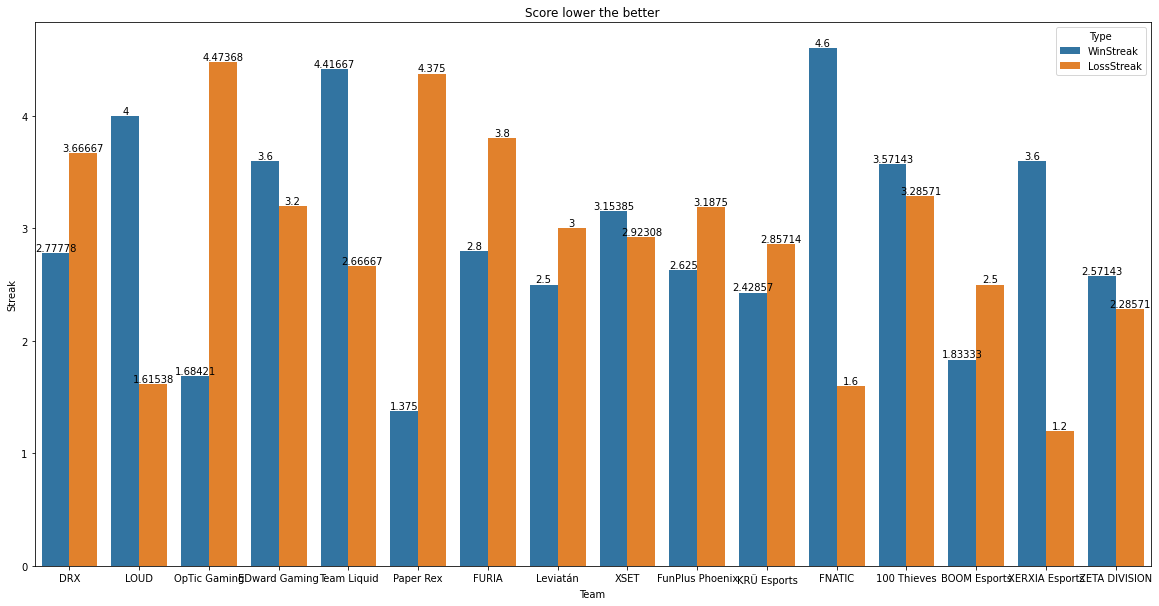

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
xa = sns.barplot(data=finalDf, x='Team', y='Streak', hue='Type', ax=ax)
for i in xa.containers:
    xa.bar_label(i,)
    
plt.title("Score lower the better")
plt.show()

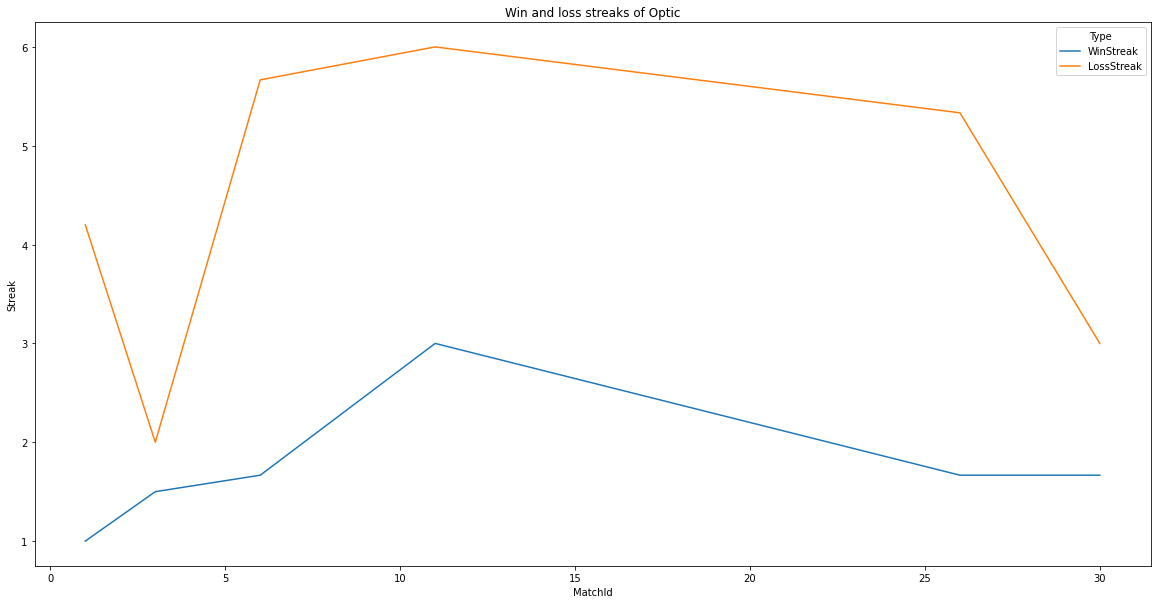

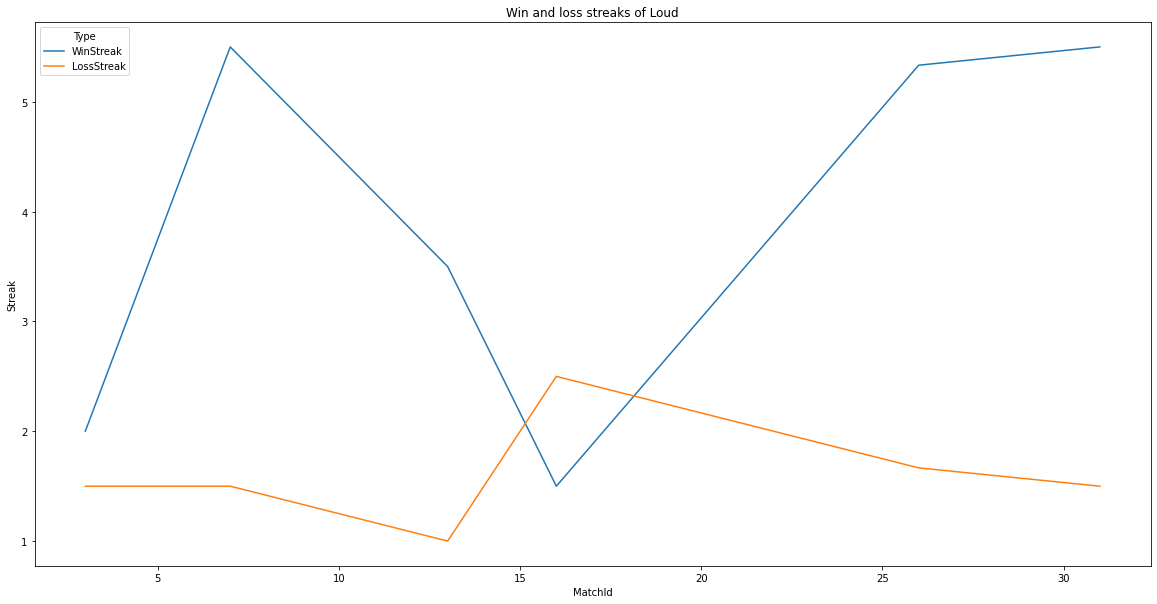

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
teamDataDf = scoreDf.loc[scoreDf['Team']=='OpTic Gaming'].reset_index(drop=True)
sns.lineplot(data=teamDataDf[['MatchId', 'WinStreak', 'LossStreak']].melt('MatchId', var_name='Type', value_name='Streak'), x='MatchId', y='Streak', hue='Type')
plt.title("Win and loss streaks of Optic")
plt.show()

fig, ax = plt.subplots(figsize=(20, 10))
teamDataDf = scoreDf.loc[scoreDf['Team']=='LOUD'].reset_index(drop=True)
sns.lineplot(data=teamDataDf[['MatchId', 'WinStreak', 'LossStreak']].melt('MatchId', var_name='Type', value_name='Streak'), x='MatchId', y='Streak', hue='Type')
plt.title("Win and loss streaks of Loud")
plt.show()